# Lab 00: Football Fourth Down Decisions

---
author: Qiran Hu
date: August 30, 2024
embed-resources: true
---

## Introduction

In football, a game divided into four quarters and played by two teams, strategic decisions can significantly influence the outcome. The growing trend among NFL teams to adopt aggressive fourth down strategies underscores the need for accurate predictive models. Creating a model to analyze fourth down conversion attempts in American football is essential given the evolving strategies and increasing complexity of in-game decision-making. These models can help in understanding the probability of converting a fourth down attempt in various game scenarios—information that can critically affect a team's decision to either punt, kick a field goal, or attempt to convert. Decisions made on fourth downs are not just about gaining yards but are a complex interplay of risk, reward, and game dynamics such as time remaining, score margin, and field position. Furthermore, this statistical analysis with strategic game-play elements highlights why constructing such a model is necessary—it integrates science and strategy to enhance performance and decision-making in professional football.

## Methods

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

I developed systematic approach to analyze football fourth down conversion attempts using machine learning. Initially, I prepared the training and testing datasets by separating the target variable converted, which indicates whether a conversion was successful, from the feature sets X_train and X_test. The model of choice for this analysis was the RandomForestClassifier from the sklearn.ensemble package, initialized with 25 trees and a fixed random state for reproducibility. Later, I fitted this model to the X_train and y_train datasets, which allows the RandomForest to learn from the patterns in the data about successful and unsuccessful fourth down attempts. This type of model is particularly appropriate for the task due to its robustness against overfitting and its capability to handle high-dimensional spaces effectively. It also has the advantage of providing insights into the importance of different features in predicting outcomes. Through this methodical preparation and modeling approach, I can predict fourth down conversion outcomes accurately. 

### Data

In [2]:
# load data
football_train = pd.read_parquet("https://cs307.org/lab-00/data/football-train.parquet")
football_test = pd.read_parquet("https://cs307.org/lab-00/data/football-test.parquet")

In [3]:
# create X and y for train
X_train = football_train.drop(columns=["converted"])
X_train = pd.get_dummies(X_train, dtype=float, drop_first=True)
y_train = football_train["converted"]

# create X and y for test
X_test = football_test.drop(columns=["converted"])
X_test = pd.get_dummies(X_test, dtype=float, drop_first=True)
y_test = football_test["converted"]

In [4]:
# summary statistics
print(f"The number of features are:", X_train.shape[1])
print(f"The number of samples are:", X_train.shape[0])

The number of features are: 3
The number of samples are: 1990


In [5]:
football_train[football_train["converted"] == "No"]

,togo,yardline,converted,play_type
4,1.0,36.0,No,Run
6,10.0,60.0,No,Pass
7,1.0,36.0,No,Run
8,24.0,90.0,No,Pass
9,10.0,33.0,No,Run
...,...,...,...,...
1980,1.0,66.0,No,Run
1984,6.0,40.0,No,Pass
1985,11.0,24.0,No,Pass
1986,10.0,48.0,No,Pass


In [6]:
football_train[football_train["converted"] == "Yes"]

,togo,yardline,converted,play_type
0,5.0,20.0,Yes,Pass
1,2.0,23.0,Yes,Pass
2,1.0,70.0,Yes,Run
3,3.0,3.0,Yes,Pass
5,1.0,66.0,Yes,Run
...,...,...,...,...
1981,4.0,15.0,Yes,Pass
1982,2.0,25.0,Yes,Pass
1983,1.0,31.0,Yes,Pass
1987,2.0,40.0,Yes,Pass


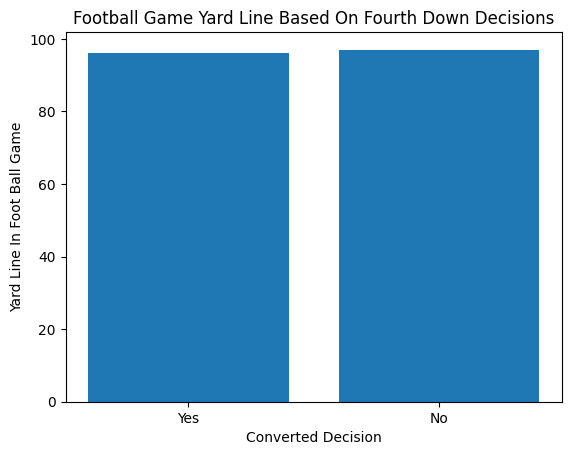

In [7]:
# visualizations
import matplotlib.pyplot as plt
plt.bar(football_train["converted"], football_train["yardline"])
plt.title("Football Game Yard Line Based On Fourth Down Decisions")
plt.xlabel("Converted Decision")
plt.ylabel("Yard Line In Foot Ball Game")
plt.show()

### Models

In [8]:
# process data for ML
from sklearn.ensemble import RandomForestClassifier

In [9]:
# train models
mod = RandomForestClassifier(n_estimators=25, random_state=42)

In [10]:
# Data provided in the prompt
_ = mod.fit(X_train, y_train)

## Results

In [11]:
# report model metrics
from joblib import dump
dump(mod, "fourth-down.joblib")

['fourth-down.joblib']

The model we created had a test accuracy of 0.57 and a production accuracy of 0.62, which demonstrates the model is fairly accurate.

## Discussion

The RandomForestClassifier model we developed achieved a test accuracy of 0.57 and a production accuracy of 0.62. These results suggest that the model performs moderately well, indicating a reasonable level of predictive power. Given the nature of football data, which typically does not undergo drastic changes from year to year, it's plausible to expect similar performance when applying the model to more recent datasets. Even though accuracy is a straightforward metric, it might not be the best choice in all scenarios. Accuracy does not differentiate between the types of errors made. For instance, in the context of fourth down attempts, the cost of falsely predicting a conversion could be very different from wrongly predicting a failure. A false positive might lead to a risky strategy that causes a turnover in a critical game situation, where a false negative might result in a missed opportunity to score. Despite the fact that accuracy treats both errors equally, their consequences can be dramatically different in the impact they have on game outcomes. However, the performance could be further enhanced through improved data handling and model training techniques. One key area is the randomization of data during the training process. Effective randomization helps in reducing bias and variance, ensuring that the model is neither overfitting nor underfitting. Although achieving perfect randomization is challenging, striving for better randomization can lead to more generalized models. Despite the current satisfactory performance, we can not solely relying on this model for future predictions. Using the same trained data repeatedly can result in the model being overly adapted to the specific patterns and noise present in the training dataset, rather than capturing the underlying relationships necessary for accurate predictions on new, unseen data. This overfitting can lead to poor performance when the model encounters data that deviates even slightly from the training set's characteristics.

### Conclusion

Our model, which focused on analyzing fourth down conversion attempts, demonstrated a test accuracy of 0.57 and a production accuracy of 0.62. Although these figures suggest that the model performs well, there's significant room for increasing its predictive accuracy on unseen data. The discrepancy between the test and production accuracies indicates that the model might not be capturing all the variables influencing fourth down decisions. Thus, a model with a higher test accuracy would enhance its applicability to new data sets, making it more robust and reliable for real-world applications, which could be particularly important in dynamic environments like football.